In [1]:
import torch
from datasets import VOCDatasets
from torchvision import transforms
from torch.utils import data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw

In [2]:
transform = transforms.Compose([
            transforms.Resize([448,448]),
            transforms.ToTensor(),
            #transforms.Normalize([0.485, 0.456, 0.406], [1, 1, 1])
])

In [9]:
dataset = VOCDatasets(transform,'train.txt',None,True)

data_loader = data.DataLoader(dataset=dataset,
                batch_size=1,
                shuffle=True,
                num_workers=4)

In [10]:
def draw_bbox(img,bbox):
    drawObject = ImageDraw.Draw(img)
    h,w = img.size
    for box_gt in bbox:
        if np.sum(box_gt) == 0:
            break
        print([(box_gt[0]*h,box_gt[1]*w)])
        
        x1 = box_gt[0]*w
        y1 = box_gt[1]*h
        
        x2 = (box_gt[0] + box_gt[2])*w
        y2 = (box_gt[1] + box_gt[3])*h
        
        
        drawObject.line([(x1,y1),(x1,y2)],"red",width=10)
        drawObject.line([(x1,y2),(x2,y2)],"red",width=10)
        drawObject.line([(x2,y2),(x2,y1)],"red",width=10)
        drawObject.line([(x2,y1),(x1,y1)],"red",width=10)
    
    return img

[[0.01       0.01       0.738      0.98798799 8.        ]
 [0.198      0.3033033  0.426      0.33633634 7.        ]]
[(111.44645595550537, 0.0)]
[(157.20593452453613, 130.32726860046387)]


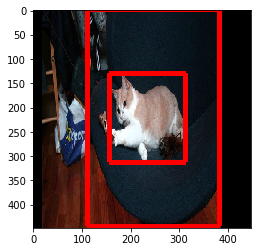

In [33]:
#for i in data_loader
unloader = transforms.ToPILImage()
img,gt = dataset[10]
#print(img)
gt = gt.numpy()
#print(gt)
img = img
img = unloader(img)
img = draw_bbox(img,gt)
plt.imshow(img)

In [6]:
for img,gt in data_loader:
    #print((gt[0,:,2] + gt[0,:,0]) )
    assert torch.sum((gt[0,:,2] + gt[0,:,0]) <= 1) == 50,(gt[0,:,2] ,gt[0,:,0])
    assert torch.sum((gt[0,:,3] + gt[0,:,1]) <= 1) == 50,(gt[0,:,3] ,gt[0,:,1])
    #assert gt[0,:,3] > gt[0,:,1]

IndexError: Traceback (most recent call last):
  File "/home/tshzzz/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/tshzzz/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/tshzzz/Documents/mygithub/one_stage_detector/Datasets.py", line 64, in __getitem__
    img,bbox = data_augment(file_name,gt_path,self.train)
  File "/home/tshzzz/Documents/mygithub/one_stage_detector/Datasets.py", line 35, in data_augment
    img, bs = seq(img.copy(), bs.copy())
  File "/home/tshzzz/Documents/mygithub/one_stage_detector/data_aug/data_aug.py", line 842, in __call__
    images, bboxes = augmentation(images, bboxes)
  File "/home/tshzzz/Documents/mygithub/one_stage_detector/data_aug/data_aug.py", line 446, in __call__
    corners[:,:8] = rotate_box(corners[:,:8], angle, cx, cy, h, w)
  File "/home/tshzzz/Documents/mygithub/one_stage_detector/data_aug/bbox_util.py", line 216, in rotate_box
    corners = np.hstack((corners, np.ones((corners.shape[0],1), dtype = type(corners[0][0]))))
IndexError: index 0 is out of bounds for axis 0 with size 0
